<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [69]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import os

import networkx as nx

from border import Border
import constants as cs
from agent import Agent
import aux as aux

from matplotlib import rc
rc('text', usetex=True)

def norm(array):
    return np.sqrt(array[0]**2 + array[1]**2)

fontsize = 14
labelsize = 14
pad = 6
color = "mediumvioletred"
cmap = matplotlib.cm.get_cmap("viridis")


In [2]:
## Open the file containing the graph in adjacency list format:

directory = "/home/maria/current/work/poli/masters_project/model/SocialForces/v2/log/0907/"
sim_code = "sim_S3000A20_V_ZERO21sc1"

G = nx.read_adjlist(directory + sim_code + "/graphs/G1000.adjlist")

In [17]:
## Show the number of nodes and edges:

len(G.nodes()), len(G.edges())

(19, 26)

In [18]:
## List the number of neighbors of a given node:

list(G.neighbors("4"))

['5', '10', '3']

In [22]:
## For each node, calculate the number of neighbors of that node:

neighbor_count = []

for node in G.nodes():
    
    number_of_neighbors = len(list(G.neighbors(node)))
    neighbor_count.append(number_of_neighbors)
    
neighbor_count = pd.Series(neighbor_count, index = G.nodes)

In [11]:
## Calculate the degree of each node, given by the number of neighbors it has divided by the number of 
## neighbors it could have:

dcs = pd.Series(nx.degree_centrality(G))
dcs.sort_values(ascending = False, inplace = True)

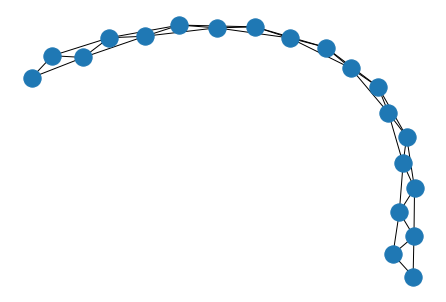

In [19]:
## Hair-ball visualization:

nx.draw(G)

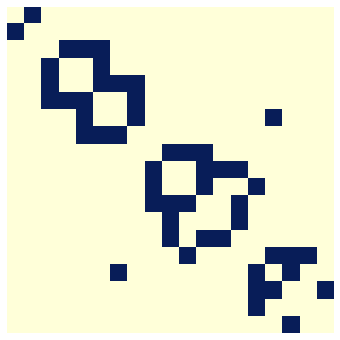

In [3]:
## Matrix plot:
from nxviz import MatrixPlot

m = MatrixPlot(G)
m.draw()

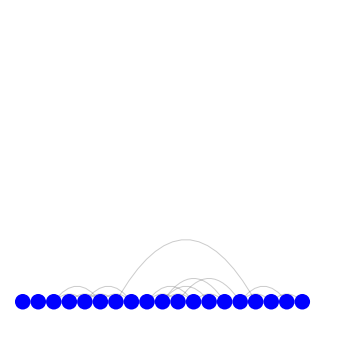

In [4]:
## Arc plot:
from nxviz import ArcPlot

a = ArcPlot(G)
a.draw()

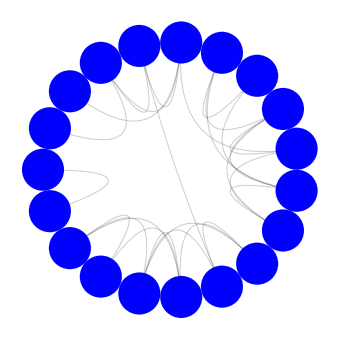

In [5]:
## Circos plot:
from nxviz import CircosPlot

c = CircosPlot(G)
c.draw()

One important concept that you should come to know is that the distribution of node-centric values can characterize classes of graphs.

Empirical cummulative distribution function:

- A step function that jumps up by 1/n at each of the n data points. 
- Its value at any specified value of the measured variable is the fraction of observations of the measured variable that are less than or equal to the specified value.

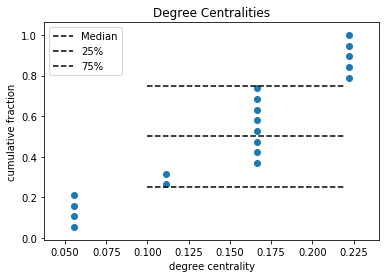

In [19]:
def ecdf(data):
    return np.sort(data), np.arange(1, len(data) + 1) / len(data)

x, y = ecdf(list(nx.degree_centrality(G).values()))

plt.scatter(x, y)
plt.xlabel("degree centrality")
plt.ylabel("cumulative fraction")
plt.title("Degree Centralities")

plt.hlines(y = 0.5, xmin=0.10, xmax = 0.22, linestyles="--", label="Median")
plt.hlines(y = 0.25, xmin=0.10, xmax = 0.22, linestyles="--", label="25%")
plt.hlines(y = 0.75, xmin=0.10, xmax = 0.22, linestyles="--", label="75%")
plt.legend()

In [67]:
## This function will index the graph files, so they can be sorted in the right order:

def file_list_indexer(file_list):

    file_list.sort()

    file_index = []

    for file in file_list:

        ## Example: G0.adjlist
        if len(file) == 10:
            file_index.append(int(file[1]))

        ## Example: G01.adjlist
        elif len(file) == 11:
            file_index.append(int(file[1:3]))

        ## Example: G001.adjlist
        elif len(file) == 12:
            file_index.append(int(file[1:4]))

        ## Example: G0001.adjlist
        elif len(file) == 13:
            file_index.append(int(file[1:5]))

    file_series = pd.Series(file_list, index = file_index) 
    file_series.sort_index(inplace = True)
    
    return file_series

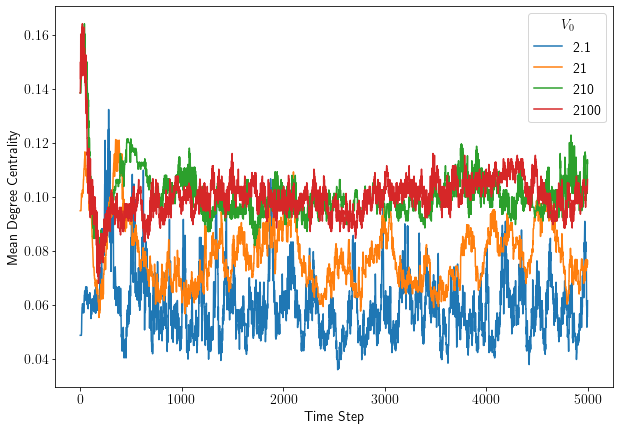

In [78]:
directory = "/home/maria/current/work/poli/masters_project/model/SocialForces/v2/log/"

sim_codes = ["0901/sim_S5000A40_V_ZERO2.1cs3", 
             "0901/sim_S5000A40_V_ZERO21cs3", 
             "0901/sim_S5000A40_V_ZERO210cs3", 
             "0901/sim_S5000A40_V_ZERO2100cs3"] 

fig, ax = plt.subplots(figsize = [10,7])

params = [2.1, 21, 210, 2100]
i = 0

for sim_code in sim_codes:
    
    param = params[i]
    
    file_list = os.listdir(directory + sim_code + "/graphs/")
    
    file_series = file_list_indexer(file_list)
    
    means = []
    
    # for each time step, we calculate the mean degree centrality:
    for index, row in file_series.iteritems():
        G = nx.read_adjlist(directory + sim_code + "/graphs/" + row)
        means.append(np.mean(list(nx.degree_centrality(G).values())))
    
    ax.plot(means, label = str(param))
    i = i + 1

ax.legend(title = r'$V_{0}$', title_fontsize = fontsize, fontsize = fontsize)
ax.set_ylabel(r'Mean Degree Centrality', fontsize = fontsize)
ax.set_xlabel(r'Time Step', fontsize = fontsize)
ax.tick_params(labelsize = fontsize)
